# Ugulava George Assignment 2 : Classification.

In [1]:
#loading data from file data_banknote_authentication.txt
import math
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

data = pd.read_table('data_banknote_authentication.txt', delimiter = ',',
            lineterminator = '\n', header = None, 
            names = ['varience', 'skewness','kurtosis','entropy', 'labels'])
# min & max for each value
print ('varience_min : ', min(data['varience'].tolist()), 
       '; varience_max : ', max(data['varience'].tolist()))
print ('skewness_min : ', min(data['skewness'].tolist()), 
       '; skewness_max : ', max(data['skewness'].tolist()))
print ('kurtosis_min : ', min(data['kurtosis'].tolist()), 
       '; kurtosis_max : ', max(data['kurtosis'].tolist()))
print ('entropy_min : ', min(data['entropy'].tolist()), 
       '; entropy_max : ', max(data['entropy'].tolist()))

varience_min :  -7.0421 ; varience_max :  6.8248
skewness_min :  -13.7731 ; skewness_max :  12.9516
kurtosis_min :  -5.2861 ; kurtosis_max :  17.9274
entropy_min :  -8.5482 ; entropy_max :  2.4495


In [2]:
#create validation sets
set1_train = data.sample(frac = 0.8, replace = True)
set1_test = data.sample(frac = 0.2, replace = True)

set2_train = data.sample(frac = 0.8, replace = False)
set2_test = data.sample(frac = 0.2, replace = False)

set3_train = data.sample(frac = 0.6, replace = True)
set3_test = data.sample(frac = 0.4, replace = True)

set4_train = data.sample(frac = 0.6, replace = False)
set4_test = data.sample(frac = 0.4, replace = False)


# Note : I used not gini index but gini Impurity for calculations.

In [3]:
#calculate gini impurity for the attribute. As input takes a pandas object(dictionary like)
#and attribute name, return impurity of the split on particular attribute
def gini_impurity(data_set, attr_name):
    values = data_set[attr_name]
    total = len(values)
    counts = {}
    for item in values:
        counts.setdefault(item, 0)
        counts[item] += 1
    impurity = 0
    for j in values:
        f1 = float(counts[j])/total
    for k in values:
        if j==k: continue
        f2 = float(counts[k])/total
        impurity += f1*f2
    return impurity

In [4]:
print('For the Dataset 1 :')
print('Gini Impurity of the attribute varience : ',
      gini_impurity(set1_train, 'varience'))
print('Gini Impurity of the attribute skewness : ',
      gini_impurity(set1_train, 'skewness'))
print('Gini Impurity of the attribute kurtosis : ',
      gini_impurity(set1_train, 'kurtosis'))
print('Gini Impurity of the attribute entropy  : ',
      gini_impurity(set1_train, 'entropy'))
print()
print('For the Dataset 2 :')
print('Gini Impurity of the attribute varience : ',
      gini_impurity(set2_train, 'varience'))
print('Gini Impurity of the attribute skewness : ',
      gini_impurity(set2_train, 'skewness'))
print('Gini Impurity of the attribute kurtosis : ',
      gini_impurity(set2_train, 'kurtosis'))
print('Gini Impurity of the attribute entropy  : ',
      gini_impurity(set2_train, 'entropy'))
print()
print('For the Dataset 3 :')
print('Gini Impurity of the attribute varience : ',
      gini_impurity(set3_train, 'varience'))
print('Gini Impurity of the attribute skewness : ',
      gini_impurity(set3_train, 'skewness'))
print('Gini Impurity of the attribute kurtosis : ',
      gini_impurity(set3_train, 'kurtosis'))
print('Gini Impurity of the attribute entropy  : ',
      gini_impurity(set3_train, 'entropy'))
print()
print('For the Dataset 4 :')
print('Gini Impurity of the attribute varience : ',
      gini_impurity(set4_train, 'varience'))
print('Gini Impurity of the attribute skewness : ',
      gini_impurity(set4_train, 'skewness'))
print('Gini Impurity of the attribute kurtosis : ',
      gini_impurity(set4_train, 'kurtosis'))
print('Gini Impurity of the attribute entropy  : ',
      gini_impurity(set4_train, 'entropy'))

For the Dataset 1 :
Gini Impurity of the attribute varience :  0.0034770952982903173
Gini Impurity of the attribute skewness :  0.0037060261910212625
Gini Impurity of the attribute kurtosis :  0.003649622927594795
Gini Impurity of the attribute entropy  :  0.003901778693501346

For the Dataset 2 :
Gini Impurity of the attribute varience :  0.0009663206160563339
Gini Impurity of the attribute skewness :  0.0021167812980049674
Gini Impurity of the attribute kurtosis :  0.0021134634589798805
Gini Impurity of the attribute entropy  :  0.0012151585429378139

For the Dataset 3 :
Gini Impurity of the attribute varience :  0.005935077340553795
Gini Impurity of the attribute skewness :  0.014551274196143939
Gini Impurity of the attribute kurtosis :  0.006183110423442612
Gini Impurity of the attribute entropy  :  0.011102433234070924

For the Dataset 4 :
Gini Impurity of the attribute varience :  0.0012815042615921973
Gini Impurity of the attribute skewness :  0.0014055208030366048
Gini Impurity

### Now according impurity reduction we see, that varience is the best argument for split(lowest impurity), skewness and curtosis are competitive and the worst one is entropy.

# Function to perform classification, print metrics and roc curves.

In [5]:
# Function to remove code dublication. Perform classification, 
# measures accuracy, precision, recal,
# plots ROC curves.
# @params : clfr_code - excplicit choise of classifier
#         : clfr - sklearn classifier object
#         : set_number - explicit number of used Data Set
#         : others are training and testing splits of Data Set
def classify_set(clfr_code, clfr, set_number, set_train, set_test):
    target_names = ['class 0', 'class 1']
    classifier = ''
    if(clfr_code == 1):
        classifier = 'Naive Bayes'
    elif(clfr_code == 0) :
        classifier = 'Decision Tree'
    elif(clfr_code == 2) :
        classifier = 'Random Forest'
        
    #split object, because labels now with the features to classify
    #Preparing Data Set 
    set_train_copy = set_train.copy()
    set_train_Y = set_train_copy['labels']
    del set_train_copy['labels']
    set_train_X = set_train_copy

    set_test_copy = set_test.copy()
    set_test_Y = set_test_copy['labels']
    del set_test_copy['labels']
    set_test_X = set_test_copy
    
    # classification and results
    clfr.fit(set_train_X, set_train_Y)
    labels_predicted = clfr.predict(set_test_X)
    print(classifier , ' Accuracy Data Set ', set_number, 
          ' : ', clfr.score(set_test_X,set_test_Y), '\n')
    print (classification_report(set_test_Y, labels_predicted, 
                                 target_names = target_names))
    predicted = clfr.predict_proba(set_test_X)
    fp, tp, threshold = roc_curve(set_test_Y,predicted[:,1])
    roc_auc = roc_auc_score(set_test_Y, predicted[:,1])
    plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1] , [0,1] , 'k--')
    plt.xlim([0.0 , 1.0])
    plt.ylim([0.0 , 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    print('========================================================')

# Naive Bayes classification
## Bernoulli schema

Naive Bayes  Accuracy Data Set  1  :  0.86496350365 

             precision    recall  f1-score   support

    class 0       0.89      0.88      0.88       161
    class 1       0.83      0.85      0.84       113

avg / total       0.87      0.86      0.87       274



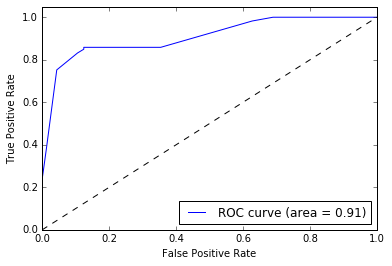

Naive Bayes  Accuracy Data Set  2  :  0.850364963504 

             precision    recall  f1-score   support

    class 0       0.86      0.87      0.87       151
    class 1       0.84      0.82      0.83       123

avg / total       0.85      0.85      0.85       274



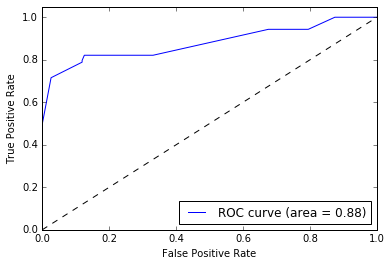

Naive Bayes  Accuracy Data Set  3  :  0.826958105647 

             precision    recall  f1-score   support

    class 0       0.85      0.84      0.85       309
    class 1       0.80      0.80      0.80       240

avg / total       0.83      0.83      0.83       549



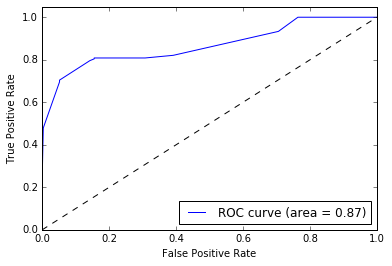

Naive Bayes  Accuracy Data Set  4  :  0.845173041894 

             precision    recall  f1-score   support

    class 0       0.86      0.85      0.86       301
    class 1       0.82      0.84      0.83       248

avg / total       0.85      0.85      0.85       549



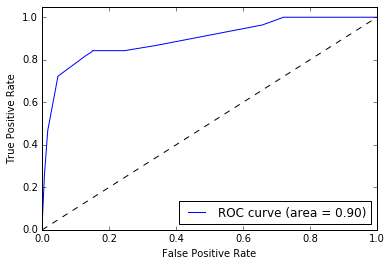

In [6]:
# Create classifier object
naive_bayes_clfr = BernoulliNB()
#perform naive bayes classification and output metrics and roc curves.
classify_set(1, naive_bayes_clfr, 1, set1_train, set1_test)
classify_set(1, naive_bayes_clfr, 2, set2_train, set2_test)
classify_set(1, naive_bayes_clfr, 3, set3_train, set3_test)
classify_set(1, naive_bayes_clfr, 4, set4_train, set4_test)

# Decision tree classification

Decision Tree  Accuracy Data Set  1  :  0.890510948905 

             precision    recall  f1-score   support

    class 0       0.93      0.88      0.90       161
    class 1       0.84      0.90      0.87       113

avg / total       0.89      0.89      0.89       274



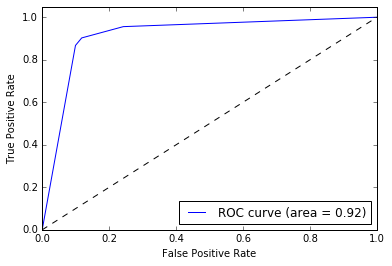

Decision Tree  Accuracy Data Set  2  :  0.923357664234 

             precision    recall  f1-score   support

    class 0       0.91      0.96      0.93       151
    class 1       0.95      0.88      0.91       123

avg / total       0.92      0.92      0.92       274



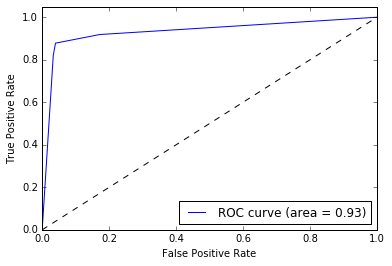

Decision Tree  Accuracy Data Set  3  :  0.899817850638 

             precision    recall  f1-score   support

    class 0       0.92      0.90      0.91       309
    class 1       0.88      0.90      0.89       240

avg / total       0.90      0.90      0.90       549



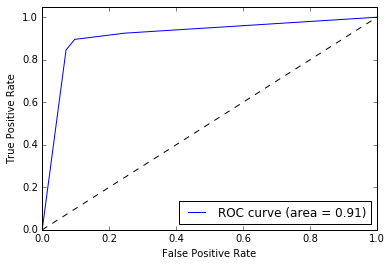

Decision Tree  Accuracy Data Set  4  :  0.918032786885 

             precision    recall  f1-score   support

    class 0       0.92      0.93      0.93       301
    class 1       0.91      0.91      0.91       248

avg / total       0.92      0.92      0.92       549



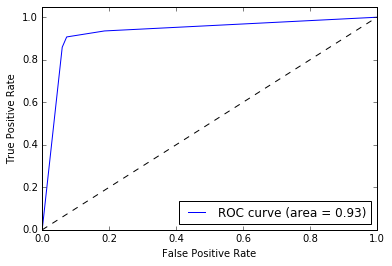

In [7]:
# Create decision Tree classifier oject
# @param : max_depth is bounded to prevent getting 100 % :)
clfr = DecisionTreeClassifier(max_depth = 2)

classify_set(0, clfr, 1, set1_train, set1_test)
classify_set(0, clfr, 2, set2_train, set2_test)
classify_set(0, clfr, 3, set3_train, set3_test)
classify_set(0, clfr, 4, set4_train, set4_test)

### The Decision tree performs better that Naive Bayes on this data set, because naive bayes assumes that all attributes independent from each other, but skewness and kurtosis hardly depend on variance(they explicitly use varience in theirs formulas). 

## Classifier improvement
### There are several ways of classifier improvenment. 
### 1)For Naive Bayes we can use diffrent distribution model : Bernoulli and Gausian(actually on this set Bernoulli performs better), and of cource busting, for example XGBoost(flexible gradient booster).
### 2)For the Decision tree : we can use diffrent depht threshold(increase), we can try another splitting model(in sklearn package we can use gini index or entropy), we can build random forest.

Random Forest  Accuracy Data Set  1  :  0.992700729927 

             precision    recall  f1-score   support

    class 0       1.00      0.99      0.99       161
    class 1       0.98      1.00      0.99       113

avg / total       0.99      0.99      0.99       274



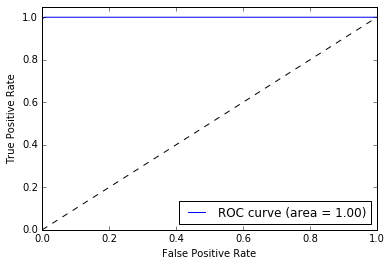

Random Forest  Accuracy Data Set  2  :  1.0 

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       151
    class 1       1.00      1.00      1.00       123

avg / total       1.00      1.00      1.00       274



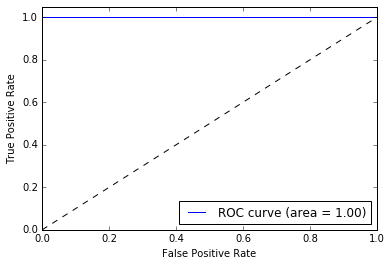

Random Forest  Accuracy Data Set  3  :  0.998178506375 

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       309
    class 1       1.00      1.00      1.00       240

avg / total       1.00      1.00      1.00       549



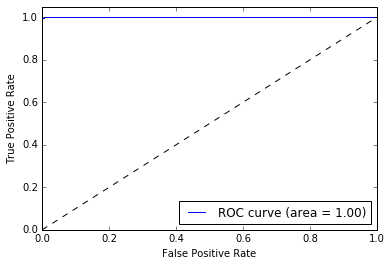

Random Forest  Accuracy Data Set  4  :  0.992714025501 

             precision    recall  f1-score   support

    class 0       1.00      0.99      0.99       301
    class 1       0.99      1.00      0.99       248

avg / total       0.99      0.99      0.99       549



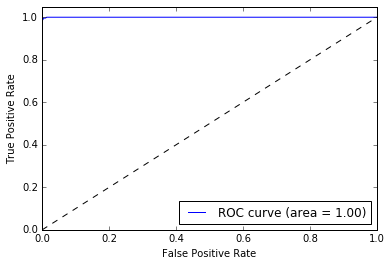

In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 25, criterion = 'gini')

classify_set(2, random_forest, 1, set1_train, set1_test)
classify_set(2, random_forest, 2, set2_train, set2_test)
classify_set(2, random_forest, 3, set3_train, set3_test)
classify_set(2, random_forest, 4, set4_train, set4_test)